# Lab 3 : Normal Distributions

## Reminders on using Google CoLab:

* Every time you reopen the lab, you need to upload the data file again
* Every time you reopen the lab, you need to run all cells again from the beginning
* If you need to add cells, hover your mouse between two cells and 
    * select `+ Code` to create a cell for your code
    * select `+ Text` to create a cell for discussion on the results, including your answers to the lab's questions 

You are welcome to save a copy of this project into your own Google folder.
* In the `File` menu, select `Save a copy in Drive`
* You can now edit the project and save your work

## Instructions

In Lab 2, you are going to do an analysis of a dataset. Below, I have included code to help you find,
* Summary Statistics (Mean, Standard Deviation, and the 5-number Summary)
* Probability Distributions (counting each category then dividing by the total)

For the example code, I am using the [Duke Forest Housing Dataset](https://www.openintro.org/data/csv/duke_forest.csv) from our [textbook dataset website](https://www.openintro.org/data/). You will want to download the dataset and then load into Google CoLab. 

After doing completing the example code, your job will be to select a dataset from the [textbook dataset website](https://www.openintro.org/data/) and perform a similar analysis. You are welcome to use the same dataset that you used for Lab 1. Remember that *an analysis is not complete without appropriate graphs*. Go back to Lab 1 to remember how to make the different types of graphs.

## Load the Data

In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
duke = pd.read_csv("../Datasets/duke_forest.csv")
duke.head()

,address,price,bed,bath,area,type,year_built,heating,cooling,parking,lot,hoa,url
0,"1 Learned Pl, Durham, NC 27705",1520000,3,4.0,6040,Single Family,1972,"Other, Gas",central,0 spaces,0.97,NaN,https://www.zillow.com/homedetails/1-Learned-P...
1,"1616 Pinecrest Rd, Durham, NC 27705",1030000,5,4.0,4475,Single Family,1969,"Forced air, Gas",central,"Carport, Covered",1.38,NaN,https://www.zillow.com/homedetails/1616-Pinecr...
2,"2418 Wrightwood Ave, Durham, NC 27705",420000,2,3.0,1745,Single Family,1959,"Forced air, Gas",central,"Garage - Attached, Covered",0.51,NaN,https://www.zillow.com/homedetails/2418-Wright...
3,"2527 Sevier St, Durham, NC 27705",680000,4,3.0,2091,Single Family,1961,"Heat pump, Other, Electric, Gas",central,"Carport, Covered",0.84,NaN,https://www.zillow.com/homedetails/2527-Sevier...
4,"2218 Myers St, Durham, NC 27707",428500,4,3.0,1772,Single Family,2020,"Forced air, Gas",central,0 spaces,0.16,NaN,https://www.zillow.com/homedetails/2218-Myers-...


## Create normal distribution

In [8]:
m = duke['price'].mean()
sd = duke['price'].std()

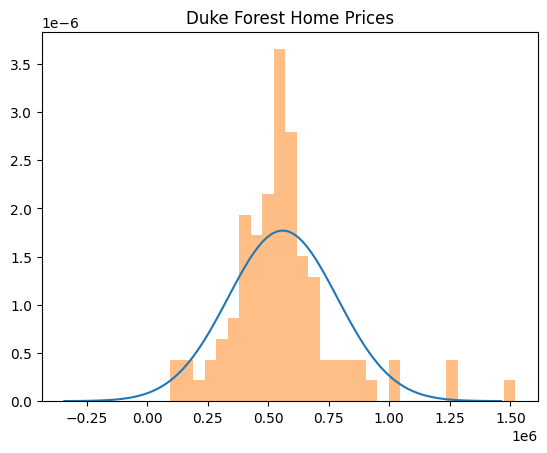

In [9]:
### Just showing the normal distribution ###
x = np.linspace(m - 4*sd, m + 4*sd, 100)
y = (1/(sd * np.sqrt(2 * np.pi))) * np.exp( -0.5 * ((x - m)/sd)**2 )

plt.plot(x, y)
plt.hist(duke['price'], density=True, bins=30, alpha=0.5)
plt.title('Duke Forest Home Prices')
plt.show()

In [ ]:
# Is your data normal?
duke['price'].describe()

In [14]:
test_statistic, p_value = stats.shapiro(duke['price'])  # if p-value < 0.05, data is not normal
print(f"Test Statistic: {test_statistic}, p-value: {p_value}")

Test Statistic: 0.9058386892761946, p-value: 3.2855376648516188e-06


In [ ]:
# Finding the CDF
stats.norm.cdf(600000, loc=m, scale=sd)  # P(X < 600000)

np.float64(0.5705889981880828)

In [ ]:
# What is the CDF of the mean?
stats.norm.cdf(m, loc=m, scale=sd)  # P(X < mean)

np.float64(0.5)

In [ ]:
# What is the CDF between 2 values?
upper_bound = 700000
lower_bound = 500000
upper_cdf = stats.norm.cdf(upper_bound, loc=m, scale=sd)
lower_cdf = stats.norm.cdf(lower_bound, loc=m, scale=sd)

print(upper_cdf - lower_cdf)  # P(500000 < X < 700000)

In [ ]:
# What value represents the 90th percentile?
stats.norm.ppf(0.9, loc=m, scale=sd)  # 90th percentile

-----
## Your turn to do the analysis

Your job now is to select a dataset from the [textbook dataset website](https://www.openintro.org/data/) and perform a similar analysis. You are welcome to use the same dataset that you used for Lab 1 and/or Lab 2. Remember that *an analysis is not complete without appropriate graphs*. Go back to Lab 1 to remember how to make the different types of graphs. Also refer back to Lab 2 for other anaylsis tools

Once your analysis is complete, answer the following questions:
* What variables from your data are normally distributed? What was the p-value from the Shapiro test?
  * What does this tell us?
* For your normal variables, identify the mean and standard deviation.
* How much of your data is below 40% of your mean? (That is, what is $P(X < 0.4\bar{x})$?)
* How much of your data is above 70% of your mean?
* How much of your data is between 25% and 40% of your mean?
* Before calculating, decide which of the following percentiles is above the mean and which are below the mean
  * [25th, 33rd, 51st, 60th, 90th]
* Find each of the following percentiles. Do they agree with your estimates from the previous question?
  * [25th, 33rd, 51st, 60th, 90th]

-----
To submit your assignment,
* Click on the `Share` button above
* Under General Access, select `Anyone with the link`
* Copy the link
* Paste the link into Canvas
* Click `Submit`